### Housing Case Study

**Problem Statement**

Optimising sale prices of properties in a city by a real estate company based on factors such as area, bedrooms, parking etc

Goals:

1. Identify variables affecting house prices.
2. Create a linear model that quantitavely relates house prices with the variables
3. Determine the accuracy of the model

In [1]:
import pandas as pd

housing = pd.read_csv('Housing.csv')

housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [2]:
# Convert yes to 1 and No to 0
housing['mainroad'] = housing['mainroad'].map({'yes': 1, 'no' : 0 })
housing['basement'] = housing['basement'].map({'yes': 1, 'no' : 0 })
housing['guestroom'] = housing['guestroom'].map({'yes': 1, 'no' : 0 })
housing['hotwaterheating'] = housing['hotwaterheating'].map({'yes': 1, 'no' : 0 })
housing['airconditioning'] = housing['airconditioning'].map({'yes': 1, 'no' : 0 })
housing['prefarea'] = housing['prefarea'].map({'yes': 1, 'no' : 0 })

housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [3]:
# furnishing status has 3 options. we need to convert them to integer values
# creating dummy variables for furnishingstatus

status = pd.get_dummies(housing['furnishingstatus'])

# we only need 2 columns in status
# we drop first column
status = pd.get_dummies(housing['furnishingstatus'], drop_first=True)

# adding the result to the neater dataframe
housing_new = pd.concat([housing, status], axis=1)

# drop the furnisgingstatus column
housing_new.drop(['furnishingstatus'], axis=1, inplace=True)
housing_new.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


In [4]:
# adding new variables that may help us. If they dont we can remove them later

# adding bathrooms per bedroom
housing_new['bbratio'] = housing_new['bathrooms'] / housing_new['bedrooms']

# adding area and bedroom ratio
housing_new['areaperbedroom'] = housing_new['area'] / housing_new['bedrooms']

housing_new.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,bbratio,areaperbedroom
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0,0.500000,1855.0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0,1.000000,2240.0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0,0.666667,3320.0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0,0.500000,1875.0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0,0.250000,1855.0


#### Re-Scaling features

In [5]:
# we use normalization technique
import numpy as np

def normalize(x):
    return ((x - np.min(x)) / (max(x) - min(x)) )

# apply the normalize function
housing_new = housing_new.apply(normalize)
housing_new.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,bbratio,areaperbedroom
0,1.000000,0.396564,0.6,0.333333,0.666667,1.0,0.0,0.0,0.0,1.0,0.666667,1.0,0.0,0.0,0.4,0.237016
1,0.909091,0.502405,0.6,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,1.000000,0.0,0.0,0.0,1.0,0.298923
2,0.909091,0.571134,0.4,0.333333,0.333333,1.0,0.0,1.0,0.0,0.0,0.666667,1.0,1.0,0.0,0.6,0.472584
3,0.906061,0.402062,0.6,0.333333,0.333333,1.0,0.0,1.0,0.0,1.0,1.000000,1.0,0.0,0.0,0.4,0.240232
4,0.836364,0.396564,0.6,0.000000,0.333333,1.0,1.0,1.0,0.0,1.0,0.666667,0.0,0.0,0.0,0.1,0.237016


#### Split data to training and testing datasets

In [6]:
# create feature variable X
X = housing_new[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'semi-furnished', 'unfurnished', 'bbratio',
       'areaperbedroom']]

# create response varaible (label)
y = housing_new['price']

# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [7]:
 # VIF Calculator function
def vif_calc(input_data, dependent_col):
    vif_df = pd.DataFrame(columns = ['Var', 'Vif'])
    x_vars = input_data.drop([dependent_col], axis=1)
    xvar_names = x_vars.columns
    for i in range(0, xvar_names.shape[0]):
        y = x_vars[xvar_names[i]]
        x = x_vars[xvar_names.drop(xvar_names[i])]
        r_squared = sm.OLS(y,x).fit().rsquared
        vif = round(1 / (1 - r_squared), 2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by= 'Vif', axis=0, ascending=False, inplace=False)

### RFE

In [9]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
rfe = RFE(lr, 9) # we want 9 columns
rfe = rfe.fit(X_train, y_train)

print(rfe.support_)
print(rfe.ranking_)

[ True False  True  True  True False False  True  True False  True False
 False  True  True]
[1 3 1 1 1 4 6 1 1 2 1 7 5 1 1]


In [11]:
cols = X_train.columns[rfe.support_]
cols

Index(['area', 'bathrooms', 'stories', 'mainroad', 'hotwaterheating',
       'airconditioning', 'prefarea', 'bbratio', 'areaperbedroom'],
      dtype='object')

### Build Model

In [12]:
X_train_rfe = X_train[cols]

# adding constant variable
import statsmodels.api as sm
X_train_rfe = sm.add_constant(X_train_rfe)

lr = sm.OLS(y_train, X_train_rfe).fit()

lr.summary()

/home/namrehs/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     80.14
Date:                Mon, 30 Dec 2019   Prob (F-statistic):           1.88e-81
Time:                        11:50:52   Log-Likelihood:                 369.54
No. Observations:                 381   AIC:                            -719.1
Df Residuals:                     371   BIC:                            -679.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0139      0.021      0.654      0.513      -0.028       0.055
area                0.7022      0.130      5.421      0.000       0.447       0.957
bathrooms           0.1718      0.098      1.759      0.079      -0.020       0.364
stories             0.0814      0.019      4.321      0.000       0.044       0.118
mainroad            0.0647      0.014      4.470      0.000       0.036       0.093
hotwaterheating     0.1002      0.022      4.523      0.000       0.057       0.144
airconditioning     0.0776      0.011      6.806      0.000       0.055       0.100
prefarea            0.0631      0.012      5.286      0.000       0.040       0.087
bbratio             0.1156      0.080      1.450      0.148      -0.041       0.272
areaperbedroom     -0.4095      0.143     -2.868      0.004      -0.690      -0.129
==============================================================================
Omnibus:                       85.512   Durbin-Watson:                   2.108
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              273.429
Skew:                           0.998   Prob(JB):                     4.22e-60
Kurtosis:                       6.638   Cond. No.                         70.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
# checking the VIF
vif_calc(input_data=housing_new.drop(['area', 'stories', 'bedrooms', 'areaperbedroom', 'semi-furnished', 'basement'], 1), dependent_col='price')

,Var,Vif
8,bbratio,6.21
1,mainroad,4.66
0,bathrooms,2.78
5,parking,1.82
4,airconditioning,1.59
7,unfurnished,1.44
6,prefarea,1.41
2,guestroom,1.28
3,hotwaterheating,1.08


### Making Predictions

In [14]:
X_test_rfe = X_test[cols]

X_test_rfe = sm.add_constant(X_test_rfe)

y_pred = lr.predict(X_test_rfe)

### Model evaluation

Text(0, 0.5, 'Housing Price')

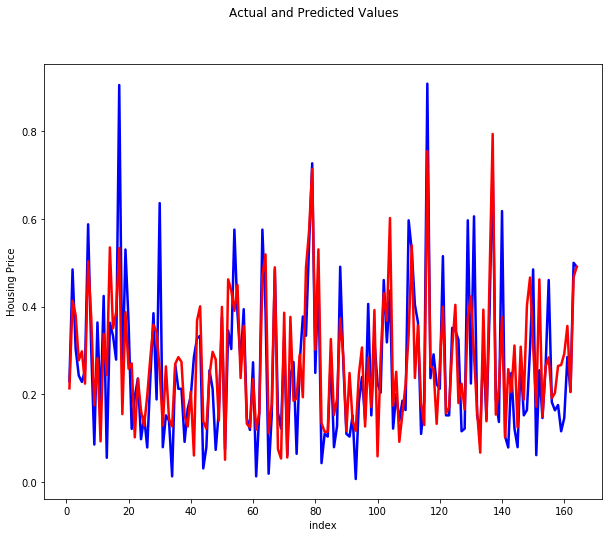

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

c = [i for i in range(1, 165, 1) ]
fig = plt.figure(figsize=(10,8))
plt.plot(c, y_test, color='blue', linewidth=2.5) # actual values
plt.plot(c, y_pred, color='red', linewidth=2.5) # predicted values
fig.suptitle('Actual and Predicted Values')
plt.xlabel('index')
plt.ylabel('Housing Price')

Text(0, 0.5, 'y_pred')

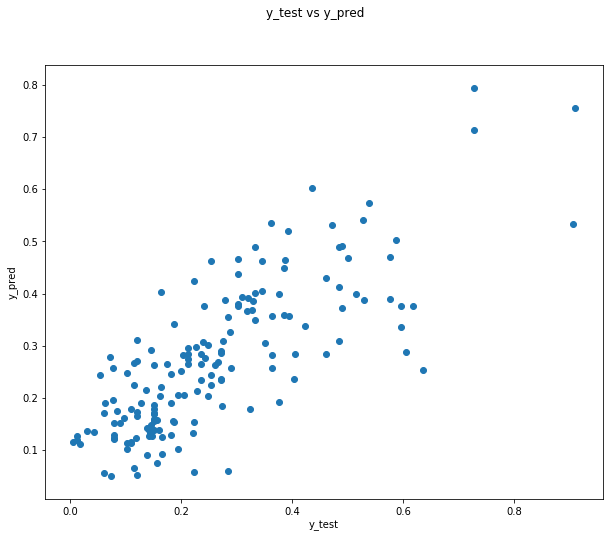

In [18]:
# using scatter plot to check the correlation of y_test and y_pred
fig = plt.figure(figsize=(10,8))
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred')
plt.xlabel('y_test')
plt.ylabel('y_pred')

In [20]:
# calculating the root mean squared
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, y_pred))

0.1082035253813171